# Exclusion Report Demo

## Setup

In [1]:
# Setup
path_to_csv = "../data/input/example-data.csv"
path_to_exclusion_metadata = "../data/input/example-exclusion-metadata.csv"
path_to_folder_of_report_data = "../data/output/report-data"
path_to_saved_visualization = "../visualization/exclusion-report.png"

## Exclusion Report

In [2]:
import pandas as pd


from helpers import (
    create_exclusion_criteria,
    apply_exclusions,
    aggregate_excluded_files,
    add_report_columns,
    create_value_counts_dataframe,
    get_viz_data_for_files,
)


df = pd.read_csv(path_to_csv)
exclusion_metadata = pd.read_csv(path_to_exclusion_metadata)
exclusion_criteria = create_exclusion_criteria(exclusion_metadata)
remaining_df = apply_exclusions(df, exclusion_criteria, path_to_folder_of_report_data)
aggregated_excluded_df = aggregate_excluded_files(path_to_exclusion_metadata, path_to_folder_of_report_data)
aggregated_excluded_df = add_report_columns(aggregated_excluded_df)
value_counts_df = create_value_counts_dataframe(aggregated_excluded_df)

Working on exclusion 0...
Working on exclusion 1...
Working on exclusion 2...


## Visualization

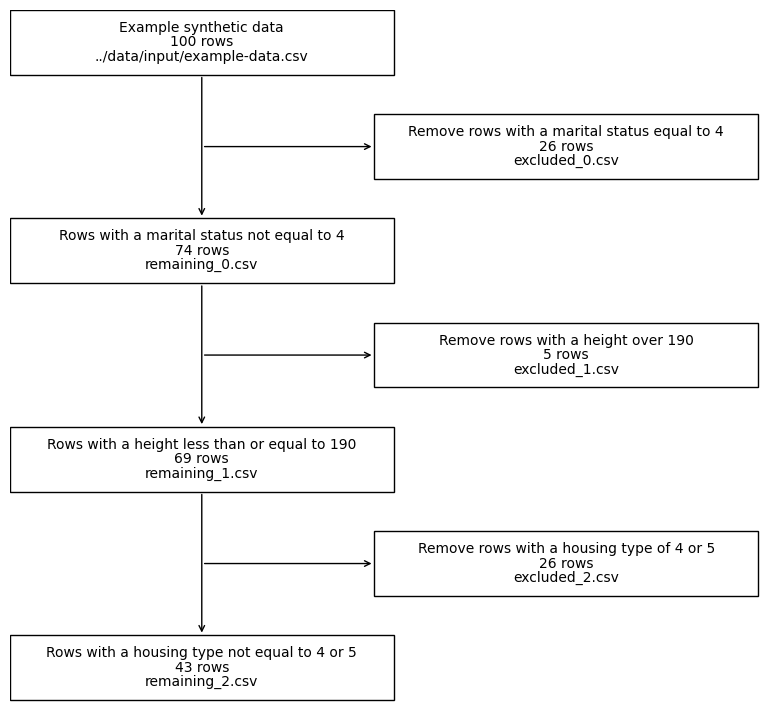

In [3]:
import matplotlib.pyplot as plt

from helpers import (
    get_viz_data_for_files,
    create_rectangle,
    add_text
)

rect_width = 5
rect_height = 2.25
space_between_rectangles_vertical = 5
space_between_rectangles_horizontal = -.25
line_spacing_within_each_box = 0.5
description_of_original_file = "Example synthetic data"


initial_record = {
    '0_description': description_of_original_file,
    '1_num_rows': f"{df.shape[0]} rows",
    '2_file_name': path_to_csv
}

viz_data_remaining = get_viz_data_for_files(exclusion_metadata, path_to_folder_of_report_data, file_type='remaining', initial_record=initial_record)
viz_data_excluded = get_viz_data_for_files(exclusion_metadata, path_to_folder_of_report_data, file_type='excluded')

n = len(exclusion_criteria) + 1

fig, ax = plt.subplots(figsize=(2 * rect_width + space_between_rectangles_horizontal, n * rect_height))

ax.set_xlim(0, 2 * rect_width + space_between_rectangles_horizontal + 0.1)
ax.set_ylim(-0.1, n * (rect_height + space_between_rectangles_vertical) - space_between_rectangles_vertical)

ax.axis('off')

for i in range(n):
    # Change the order in which the boxes are drawn
    rect_x = 0
    rect_y = (n - 1 - i) * (rect_height + space_between_rectangles_vertical)
    create_rectangle(ax, rect_x, rect_y, rect_width, rect_height, edgecolor='black')
    primary_rect_text = viz_data_remaining[viz_data_remaining['boxNumber'] == i]['lineContent'].tolist()
    add_text(ax, rect_x + rect_width / 2, rect_y + rect_height / 2, primary_rect_text, line_spacing_within_each_box)

    if i < n :
        line_x1 = rect_x + rect_width / 2
        line_y1 = rect_y + rect_height
        line_x2 = rect_x + rect_width / 2
        line_y2 = rect_y + rect_height + space_between_rectangles_vertical
        ax.annotate('', xy=(line_x2, line_y2), xytext=(line_x1, line_y1),
                    arrowprops=dict(arrowstyle='<-', color='black'))

        horizontal_line_x1 = line_x1
        horizontal_line_y1 = (line_y1 + line_y2) / 2
        horizontal_line_x2 = rect_width + space_between_rectangles_horizontal
        horizontal_line_y2 = horizontal_line_y1
        ax.annotate('', xy=(horizontal_line_x2, horizontal_line_y2), xytext=(horizontal_line_x1, horizontal_line_y1),
                    arrowprops=dict(arrowstyle='->', color='black'))

for i in range(n - 1):
    rect_x = rect_width + space_between_rectangles_horizontal
    rect_y = (n - 2 - i) * (rect_height + space_between_rectangles_vertical) + (rect_height + space_between_rectangles_vertical) / 2
    create_rectangle(ax, rect_x, rect_y, rect_width, rect_height, edgecolor='black')
    secondary_rect_text = viz_data_excluded[viz_data_excluded['boxNumber'] == i]['lineContent'].tolist()
    add_text(ax, rect_x + rect_width / 2, rect_y + rect_height / 2, secondary_rect_text, line_spacing_within_each_box)

fig.savefig(path_to_saved_visualization, dpi=300, bbox_inches='tight')
plt.show()

## Save viz-data to CSV for JavaScript Program

In [10]:
viz_data_remaining.to_csv("../data/output/viz-data/vizDataRemaining.csv")
viz_data_excluded.to_csv("../data/output/viz-data/vizDataExcluded.csv")